In [606]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import export_graphviz  
from IPython.display import Image  
import pydotplus
from six import StringIO
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [636]:
# fetch dataset

iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# # metadata 
# print(iris.metadata) 
  
# # variable information 
# print(iris.variables) 

In [375]:
# from sklearn.datasets import load_iris
# data = load_iris()
# X = data.data  
# y = data.target 

In [534]:
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
#print(wine_quality.metadata) 
  
# variable information 
#print(wine_quality.variables) 

In [475]:
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

In [651]:
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  

In [652]:
from sklearn.model_selection import train_test_split
# Identify categorical columns (non-float, non-int)
categorical_cols = X.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Preprocessor: Scale numeric + one-hot encode categorical
preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),  # Scale numeric features
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
        ])

X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train = preprocessor.fit_transform(X_train_pre)
X_test = preprocessor.transform(X_test_pre)

In [613]:
def feature_scaling(X_train, X_test):
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, sc

def confusion_matrix(y_test, y_pred, target_names):
    from sklearn.metrics import confusion_matrix, accuracy_score
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print(accuracy_score(y_test, y_pred))
    

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Greens', cbar=False, 
                xticklabels=target_names, yticklabels=target_names)
    
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
0.9736842105263158


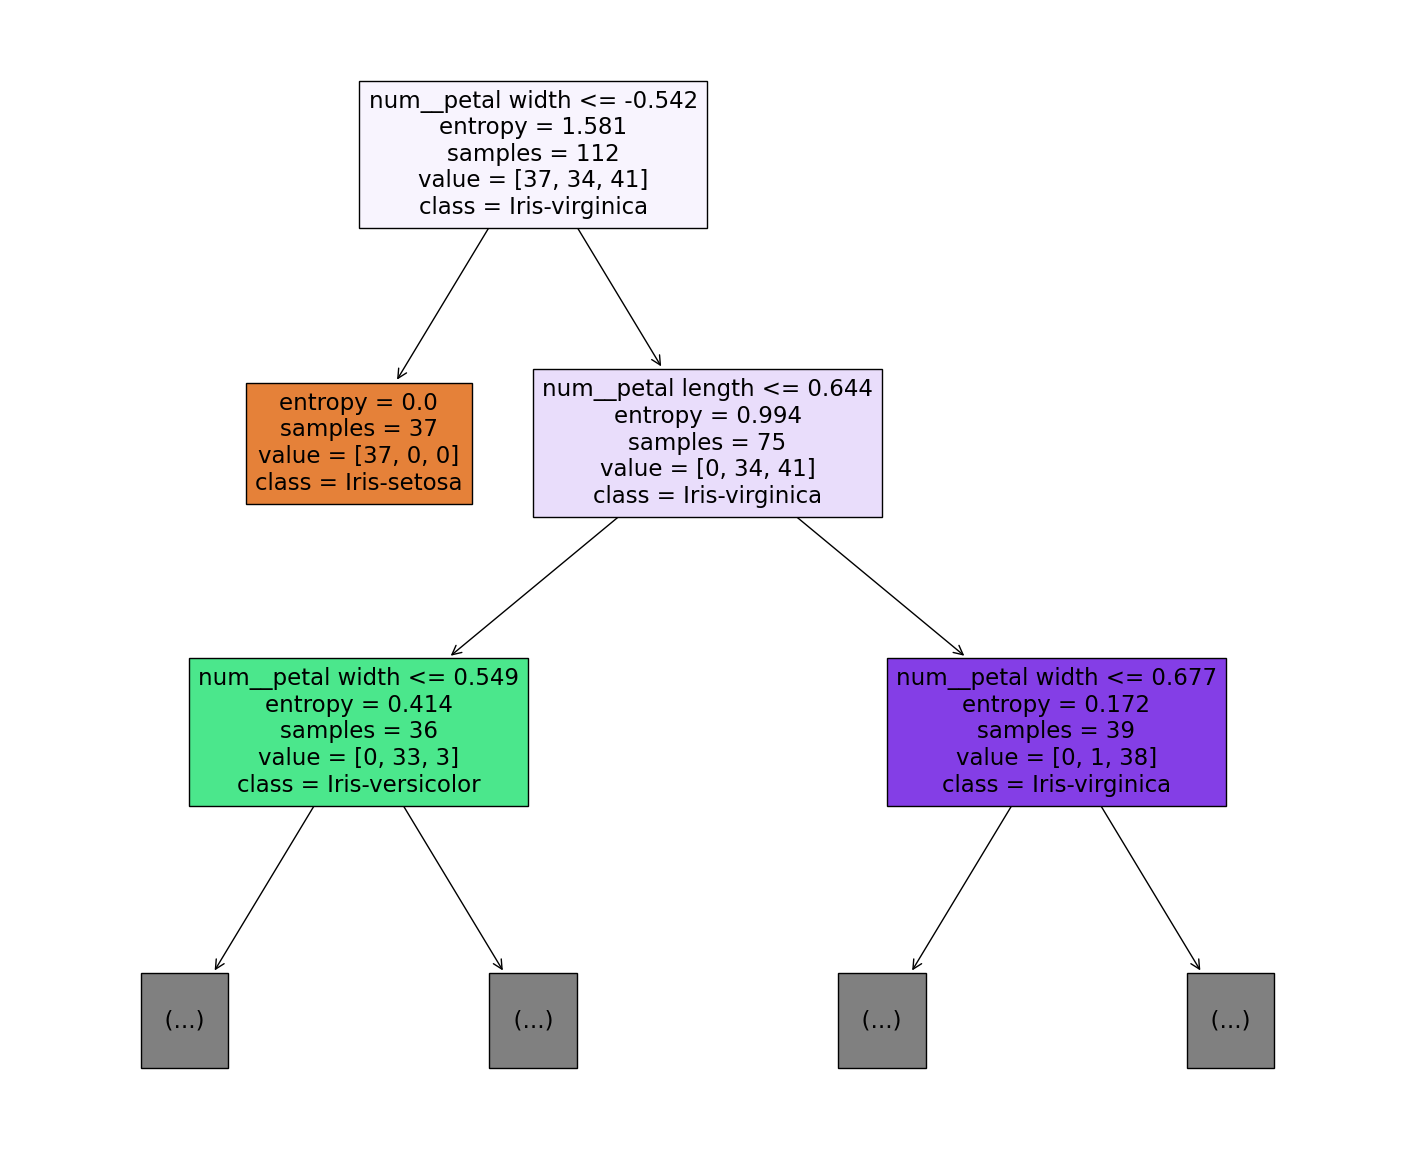

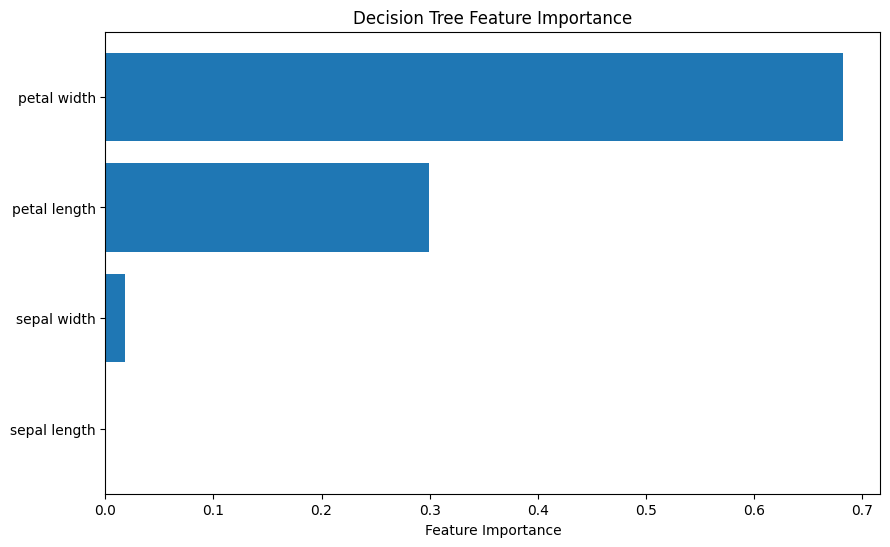

In [529]:
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# confusion_matrix(y_test,y_pred)

# if hasattr(classifier, 'classes_'):
#     class_names = [str(cls) for cls in classifier.classes_]
# else:
#     class_names = [str(cls) for cls in np.unique(y_train)]
 
# plt.figure(figsize=(18, 15))
# plot_tree(classifier, filled=True, feature_names=preprocessor.get_feature_names_out(),
#           class_names=class_names, max_depth=2
#          )
# plt.show()

# # For high-dimensional data, feature importance is more useful
# feature_importance = classifier.feature_importances_
# feature_names = X.columns.to_list()  # Your feature names

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(feature_importance)), feature_importance, align='center')
# plt.yticks(range(len(feature_importance)), feature_names)
# plt.xlabel('Feature Importance')
# plt.title('Decision Tree Feature Importance')
# plt.show()

In [638]:
def decision_tree_classifier(X, y, X_train, y_train, X_test, y_test):
    

    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    
    if hasattr(classifier, 'classes_'):
        class_names = [str(cls) for cls in classifier.classes_]
    else:
        class_names = [str(cls) for cls in np.unique(y_train)]
    confusion_matrix(y_test,y_pred, class_names)
     
    plt.figure(figsize=(24, 20))
    actual_depth = classifier.get_depth()
    plot_depth = 2 if actual_depth > 5 else None
    plot_tree(classifier, filled=True, feature_names=preprocessor.get_feature_names_out(),
              class_names=class_names, max_depth=plot_depth,
              fontsize=12,  # Larger font size
          proportion=True,  # Better spacing
          rounded=True,   # Rounded corners for better appearance
          precision=2    # Control decimal places
             )
    plt.show()
    
    # For high-dimensional data, feature importance is more useful
    feature_importance = classifier.feature_importances_
    feature_names = preprocessor.get_feature_names_out() # Your feature names
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_importance)), feature_importance, align='center')
    plt.yticks(range(len(feature_importance)), feature_names)
    plt.xlabel('Feature Importance')
    plt.title('Decision Tree Feature Importance')
    plt.show()

    return y_pred

    # X_set, y_set = sc.inverse_transform(X_train), y_train
    # # Reduce to 2D using PCA
    # pca = PCA(n_components=2)
    # X_pca = pca.fit_transform(X_set)
    
    # # Use PCA-transformed data for visualization
    # X1, X2 = np.meshgrid(
    #     np.arange(start=X_pca[:, 0].min() - 1, stop=X_pca[:, 0].max() + 1, step=0.01),
    #     np.arange(start=X_pca[:, 1].min() - 1, stop=X_pca[:, 1].max() + 1, step=0.01)
    # )
    
    # # Transform meshgrid points through PCA inverse
    # meshgrid_pca = np.array([X1.ravel(), X2.ravel()]).T
    # meshgrid_original = pca.inverse_transform(meshgrid_pca)
    
    # Z = classifier.predict(sc.transform(meshgrid_original)).reshape(X1.shape)
    # plt.contourf(np.array(X1,dtype=float), np.array(X2,dtype=float), np.array(Z,dtype=float), alpha=0.75, cmap=ListedColormap(['#FA8072', '#1E90FF']))
    
    # plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_set, cmap=ListedColormap(['#FA8072', '#1E90FF']))
    # plt.title('Decision Boundary (PCA Projection)')
    # plt.xlabel('Principal Component 1')
    # plt.ylabel('Principal Component 2')
    # plt.show()

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
0.9736842105263158


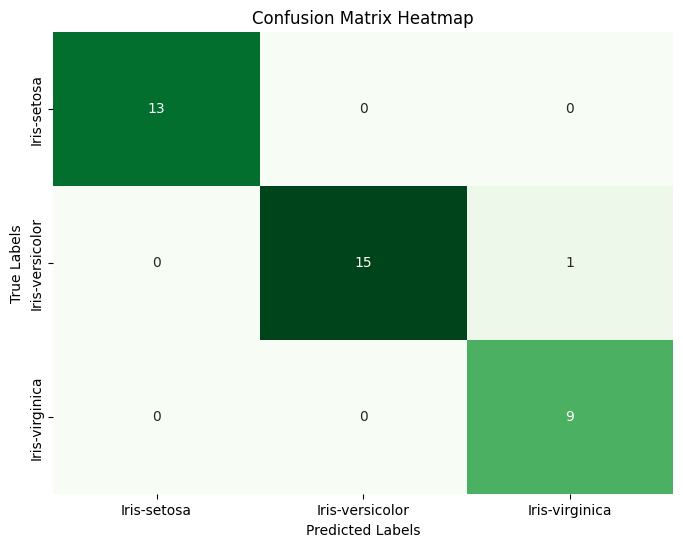

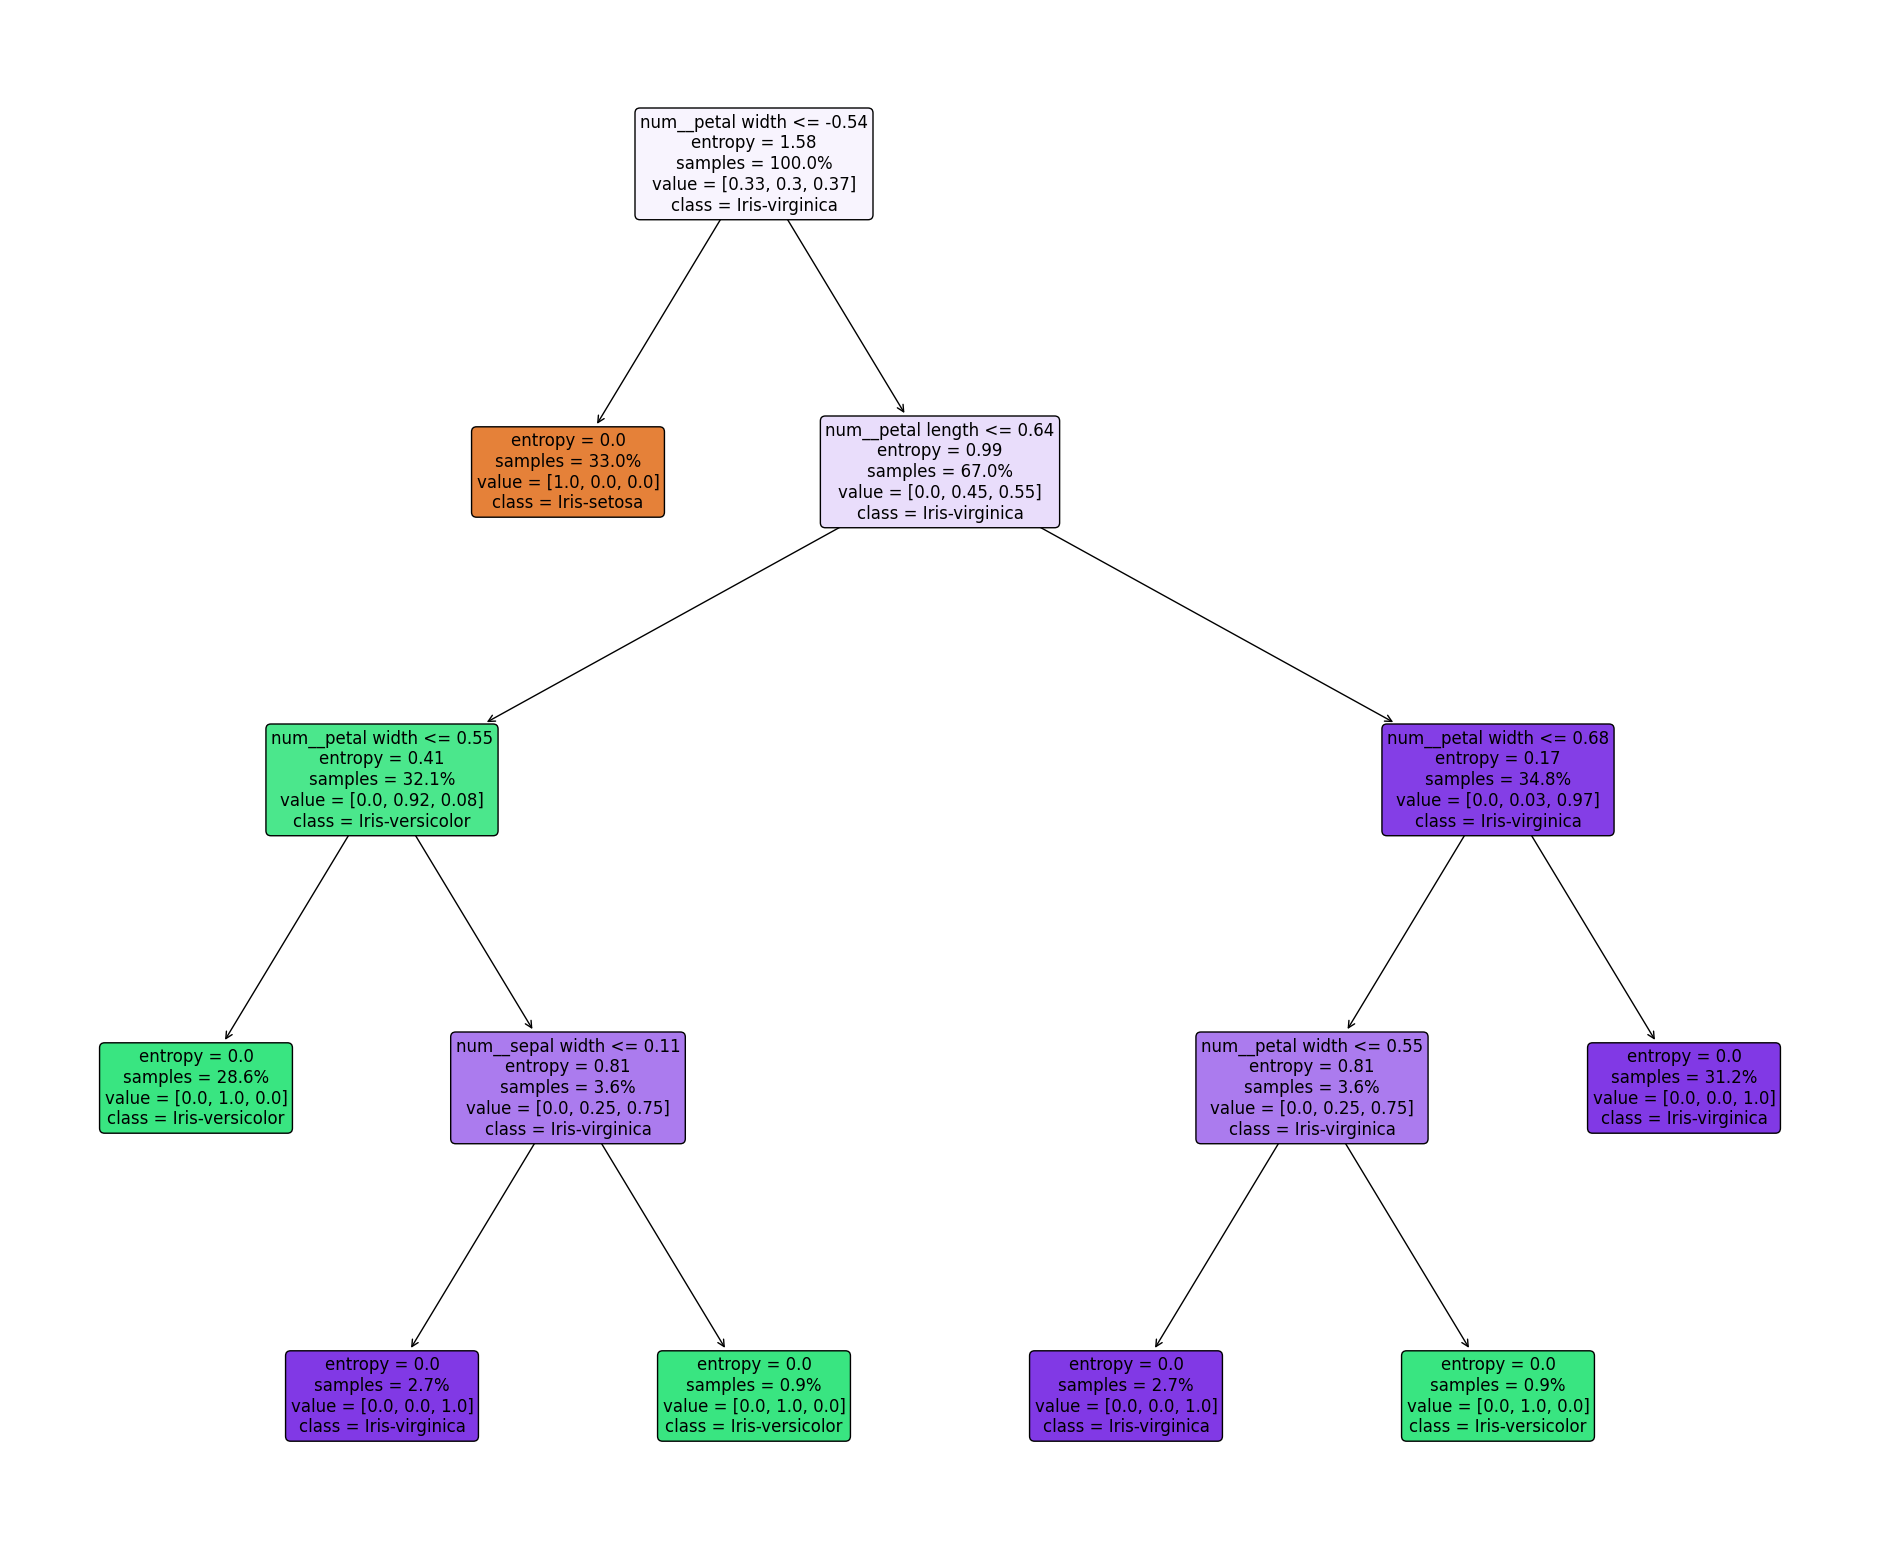

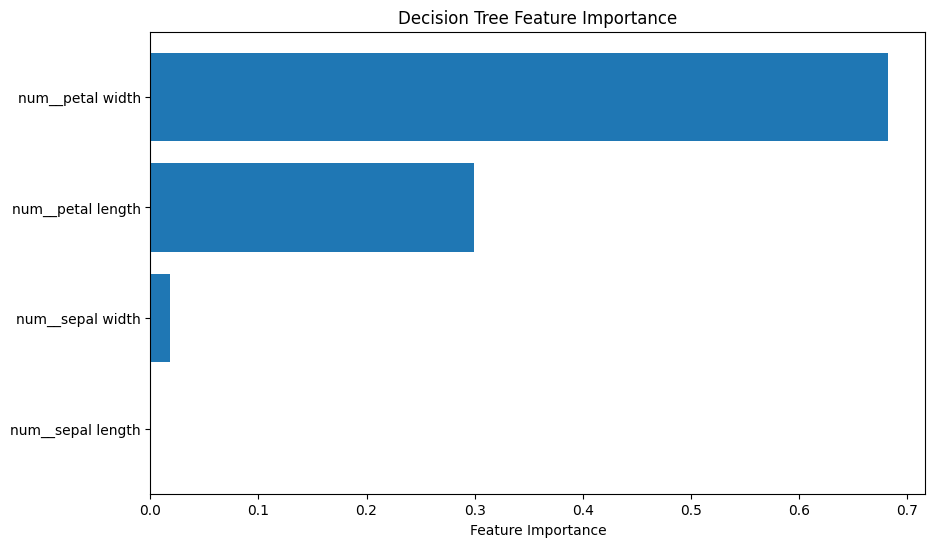

In [639]:
dtr_result = decision_tree_classifier(X,y, X_train, y_train, X_test, y_test)

In [645]:
def knn(X_train, y_train, X_test, y_test):
    X_train, X_test, sc = feature_scaling(X_train, X_test)
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    if hasattr(classifier, 'classes_'):
        class_names = [str(cls) for cls in classifier.classes_]
    else:
        class_names = [str(cls) for cls in np.unique(y_train)]
        
    confusion_matrix(y_test,y_pred, class_names)

    return y_pred

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
0.9736842105263158


C:\Users\Norbert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


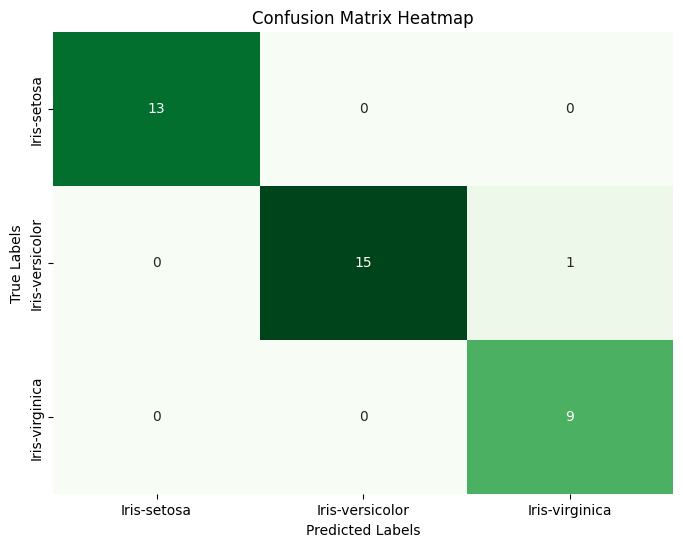

In [646]:
knn_res = knn(X_train, y_train, X_test, y_test)

In [632]:
def kernel_svm(X_train, y_train, X_test, y_test):
    X_train, X_test, sc = feature_scaling(X_train, X_test)
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    if hasattr(classifier, 'classes_'):
        class_names = [str(cls) for cls in classifier.classes_]
    else:
        class_names = [str(cls) for cls in np.unique(y_train)]
        
    confusion_matrix(y_test,y_pred, class_names)

    return y_pred

C:\Users\Norbert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[72  6  0  0  0  0  0]
 [ 5 52  0  0  0  6  6]
 [ 0  6 71  3  0  0  6]
 [ 0  0  0 73  0  0  0]
 [ 0  1  0  0 87  0  0]
 [ 0 12  1  0  0 52  3]
 [ 0  9  4  0  0  7 46]]
0.8579545454545454


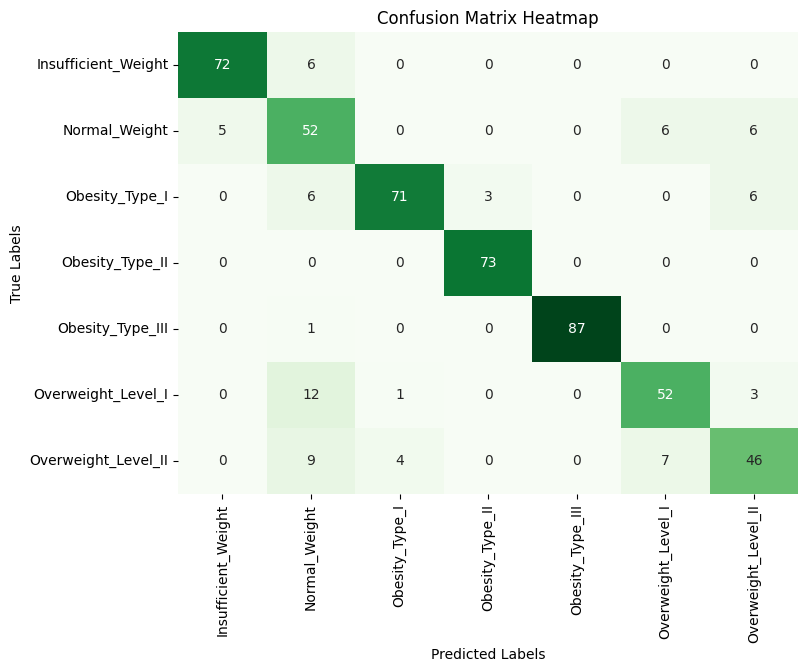

In [633]:
ksvm_res = kernel_svm(X_train, y_train, X_test, y_test)

In [630]:
def svm(X_train, y_train, X_test, y_test):
    X_train, X_test, sc = feature_scaling(X_train, X_test)
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    if hasattr(classifier, 'classes_'):
        class_names = [str(cls) for cls in classifier.classes_]
    else:
        class_names = [str(cls) for cls in np.unique(y_train)]
        
    confusion_matrix(y_test,y_pred, class_names)

    return y_pred

C:\Users\Norbert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[77  1  0  0  0  0  0]
 [ 6 59  0  0  0  4  0]
 [ 0  0 85  0  0  0  1]
 [ 0  0  0 73  0  0  0]
 [ 0  0  1  0 87  0  0]
 [ 0  3  0  0  0 61  4]
 [ 0  0  1  0  0  2 63]]
0.9564393939393939


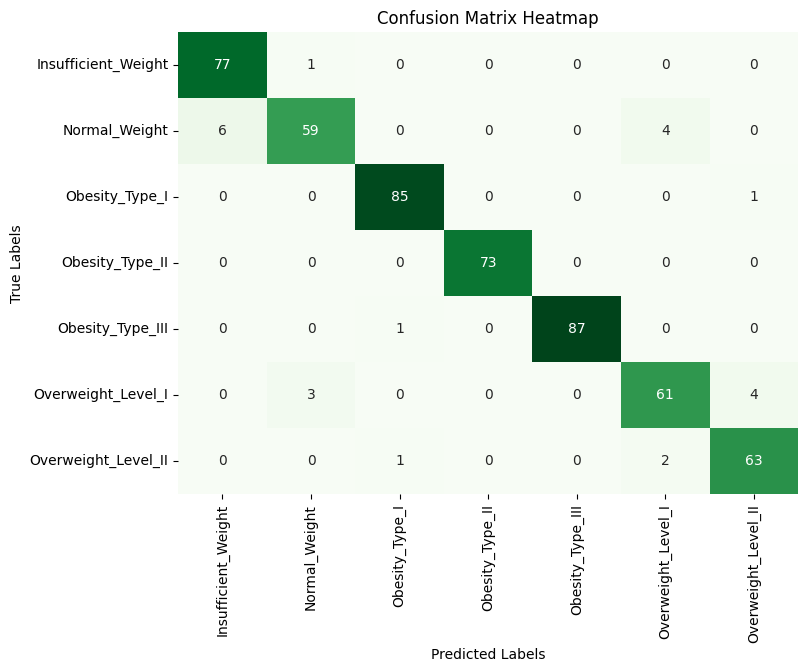

In [631]:
svm_res = svm(X_train, y_train, X_test, y_test)

In [653]:
def logistic_regression(X_train, y_train, X_test, y_test):
    X_train, X_test, sc = feature_scaling(X_train, X_test)
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    if hasattr(classifier, 'classes_'):
        class_names = [str(cls) for cls in classifier.classes_]
    else:
        class_names = [str(cls) for cls in np.unique(y_train)]
        
    confusion_matrix(y_test,y_pred, class_names)

    return y_pred

C:\Users\Norbert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Norbert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[75  3  0  0  0  0  0]
 [ 5 57  0  0  0  6  1]
 [ 0  0 76  3  5  0  2]
 [ 0  0  0 73  0  0  0]
 [ 0  0  0  1 87  0  0]
 [ 0  8  0  0  0 52  8]
 [ 0  0  6  1  1  5 53]]
0.8958333333333334


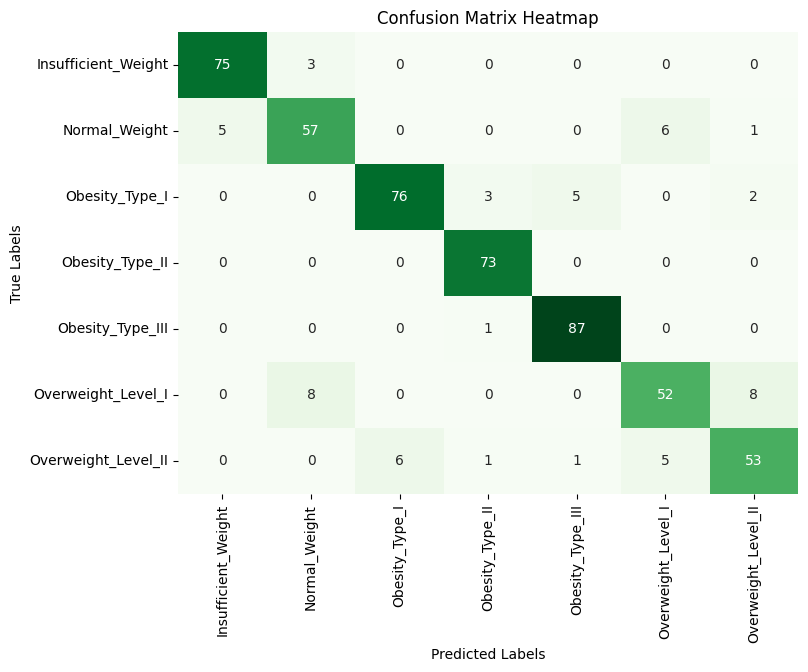

In [654]:
lr_res = logistic_regression(X_train, y_train, X_test, y_test)

In [624]:
def naive_bayes(X_train, y_train, X_test, y_test):
    X_train, X_test, sc = feature_scaling(X_train, X_test)
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    if hasattr(classifier, 'classes_'):
        class_names = [str(cls) for cls in classifier.classes_]
    else:
        class_names = [str(cls) for cls in np.unique(y_train)]
        
    confusion_matrix(y_test,y_pred, class_names)

    return y_pred

[[76  1  0  0  0  1  0]
 [55  6  1  0  0  5  2]
 [15  2 48 18  1  0  2]
 [ 0  0 12 60  0  0  1]
 [ 0  0  1  0 87  0  0]
 [40  6 12  1  0  6  3]
 [25  2 20 12  0  0  7]]
0.5492424242424242


C:\Users\Norbert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


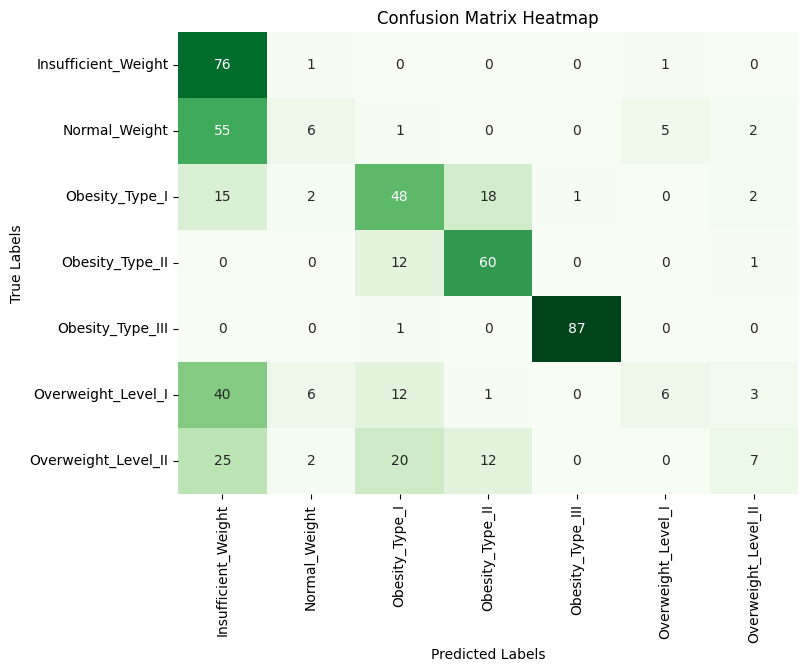

In [625]:
nb_res = naive_bayes(X_train, y_train, X_test, y_test)

In [641]:
def random_forest(X_train, y_train, X_test, y_test):
    X_train, X_test, sc = feature_scaling(X_train, X_test)
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0, max_depth=None, min_samples_split=2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    #confusion_matrix(y_test,y_pred)
    
    if hasattr(classifier, 'classes_'):
        class_names = [str(cls) for cls in classifier.classes_]
    else:
        class_names = [str(cls) for cls in np.unique(y_train)]
        
    confusion_matrix(y_test,y_pred, class_names)
    
    # For high-dimensional data, feature importance is more useful
    feature_importance = classifier.feature_importances_
    feature_names = preprocessor.get_feature_names_out() # Your feature names
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_importance)), feature_importance, align='center')
    plt.yticks(range(len(feature_importance)), feature_names)
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.show()

    return y_pred

C:\Users\Norbert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
0.9736842105263158


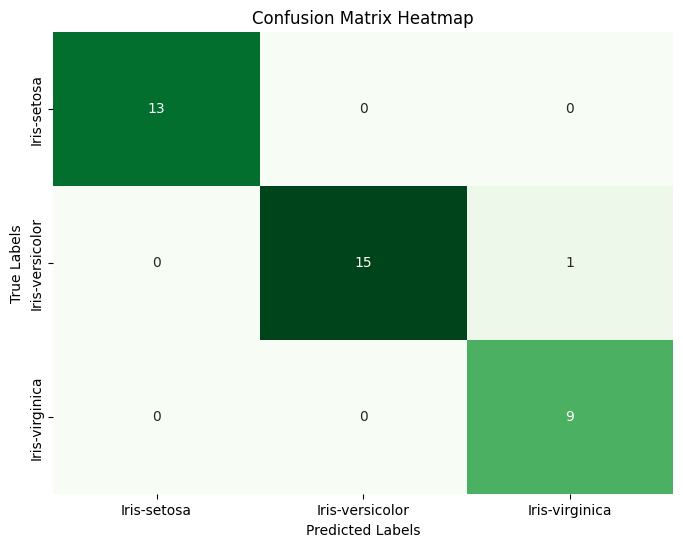

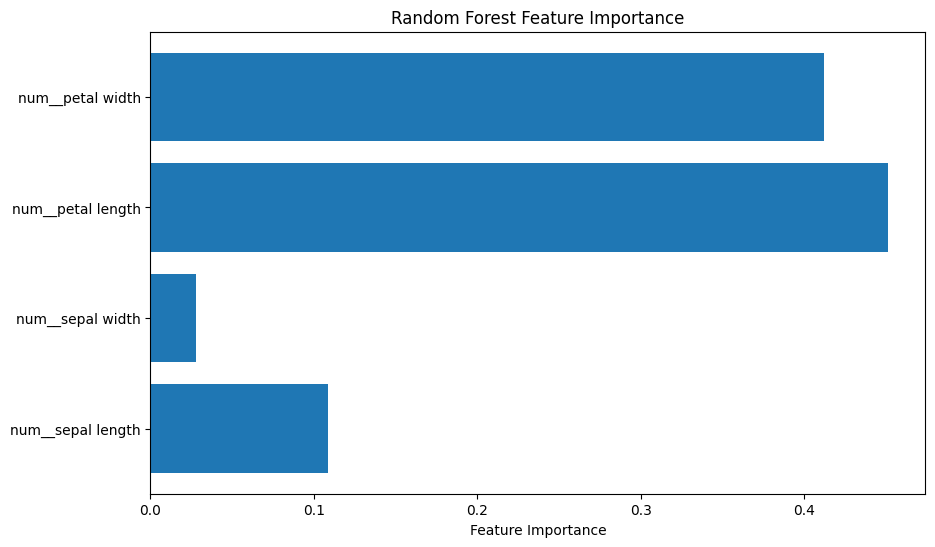

In [642]:
rf_res = random_forest(X_train, y_train, X_test, y_test)

In [ ]:
###attempt to use PCA

In [643]:
def knn_pca(X_train, y_train, X_test, y_test):
    X_train, X_test, sc = feature_scaling(X_train, X_test)

    pca = PCA(n_components=2)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    if hasattr(classifier, 'classes_'):
        class_names = [str(cls) for cls in classifier.classes_]
    else:
        class_names = [str(cls) for cls in np.unique(y_train)]
        
    confusion_matrix(y_test,y_pred, class_names)

    return y_pred

C:\Users\Norbert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[13  0  0]
 [ 0 13  3]
 [ 0  1  8]]
0.8947368421052632


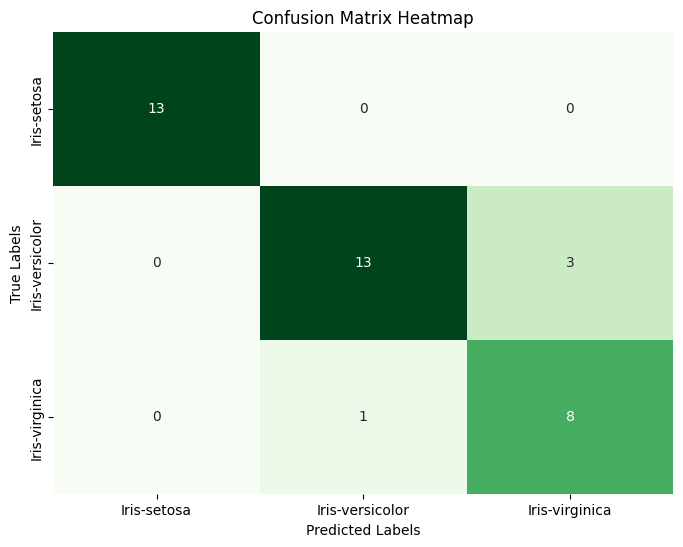

In [644]:
knn_pca_res = knn_pca(X_train, y_train, X_test, y_test)

In [649]:
def logistic_regression_pca(X_train, y_train, X_test, y_test):
    X_train, X_test, sc = feature_scaling(X_train, X_test)
    from sklearn.linear_model import LogisticRegression
    pca = PCA(n_components=2)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    if hasattr(classifier, 'classes_'):
        class_names = [str(cls) for cls in classifier.classes_]
    else:
        class_names = [str(cls) for cls in np.unique(y_train)]
        
    confusion_matrix(y_test,y_pred, class_names)

    return y_pred

C:\Users\Norbert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[23 21  6  2  0 20  6]
 [14 26  4  0  0 22  3]
 [ 1 11 31 13  3 15 12]
 [ 0  0 14 51  1  0  7]
 [ 0  0  0  0 88  0  0]
 [ 8 11 16  5  0 24  4]
 [ 0 12 22 13  0  6 13]]
0.48484848484848486


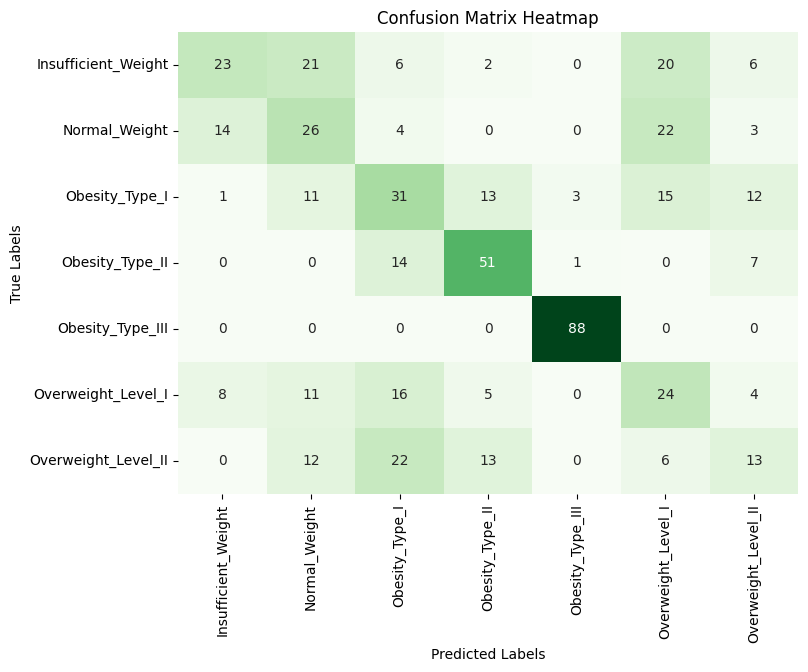

In [655]:
lr_pca_res = logistic_regression_pca(X_train, y_train, X_test, y_test)